<a href="https://colab.research.google.com/github/nveenkumr/Lending-Club-Case-Study/blob/master/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Case Study 

## Business Objective
 -  You work for a consumer finance company which is specialized in lending loans to urban customers
 -  Objective is to find out the main drivers which provide strong indication of deafulting a loan application.

### Step1 :-  Data Understanding

In [1552]:
#import libraries
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [1553]:
# loading the data 
dfloan = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip" , encoding = "ISO-8859-1" ,low_memory=False)
#dfloan = pd.read_csv("loan.csv" , encoding = "ISO-8859-1" ,low_memory=False)

In [1554]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [1555]:
dfloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1556]:
dfloan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [1557]:
# generic function to check the percentage of null columns
def calnullpercentage(mdf):
    print(mdf.isnull().sum()/len(mdf.index) *100)

### Checking the null percentage of columns in main datafranme dfloan

In [1558]:
# checking the null percentage of columns in this dataframe dfloan
calnullpercentage(dfloan)


id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

#### As we can see most of the columns contains 100% null values . Hence lets remove those values.

In [1559]:
#Remove the columns contains 100% null values 
dfloan1 = dfloan[dfloan.columns[~dfloan.isnull().all()]]
dfloan1.shape

(39717, 57)

In [1560]:
calnullpercentage(dfloan1)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Creating Generic Column overview table which will display the columns information like their datatypes MissingVal , Unique values , Top Value 

In [1561]:
def ColsOverview(ldf):
    loanColsOverview = pd.DataFrame(ldf.dtypes, columns=['dtypes'])
    loanColsOverview['colName'] = loanColsOverview.index
    loanColsOverview =loanColsOverview.reset_index()
    loanColsOverview = loanColsOverview[['colName', 'dtypes']]
    loanColsOverview['Missingval'] = ldf.isnull().sum().values
    loanColsOverview['UniqueVal'] = ldf.nunique().values  
    
    loanColsOverview['TopVal'] = [ ldf[i].value_counts().index[0] for i in ldf.columns ]
    return loanColsOverview

In [1562]:
dfsummary = ColsOverview(dfloan1)
dfsummary

,colName,dtypes,Missingval,UniqueVal,TopVal
0,id,int64,0,39717,1052670
1,member_id,int64,0,39717,745584
2,loan_amnt,int64,0,885,10000
3,funded_amnt,int64,0,1041,10000
4,funded_amnt_inv,float64,0,8205,5000
5,term,object,0,2,36 months
6,int_rate,object,0,371,10.99%
7,installment,float64,0,15383,311.11
8,grade,object,0,7,B
9,sub_grade,object,0,35,B3


###  There are many columns with only 1 unique value means these columns doesnt have any variance and  can be dropped out  from loan analysis
- pymnt_plan,
- initial_list_status,
- collections_12_mths_ex_med,
- policy_code,
- application_type,
- acc_now_delinq,
- chargeoff_within_12_mths,
- delinq_amnt,
- tax_liens


In [1563]:
# logic to exclude the columns which doesnt add any variance 
colswithoneval = dfsummary[dfsummary.UniqueVal==1]['colName'].to_list()
dfloan1 = dfloan1.loc[:,~dfloan1.columns.isin(colswithoneval)]

In [1564]:
calnullpercentage(dfloan1)

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

### Still there are columns like mths_since_last_delinq ,mths_since_last_record,next_pymnt_d having null values greater than 60 % and will not be adding any value to our analysis , hence removing those columns

In [1565]:
# Removing column with 60 % null values
dfloan1 = dfloan1[dfloan1.columns[ ~(((dfloan1.isnull().sum()/dfloan1.shape[0])*100) >60)]]


#### Removing the description column also as it contain 32 % null vals and will not help in analysing the top 5 loan default indicators or drivers 

In [1566]:

dfloan1 = dfloan1.loc[:,~dfloan1.columns.isin(['desc' , 'url'])]


#### Employee title has 6 % null values , and cannot be imputed with any value as every person has its own job titile , title of loan has 0.024156 values   , last_pymnt_d has 0.178 null values
#### Hence remove the rows where employee title , title , lastpayment_date  is null

In [1567]:

dfloan1= dfloan1[~dfloan1.emp_title.isnull()]
dfloan1= dfloan1[~dfloan1.title.isnull()]
dfloan1 = dfloan1[~dfloan1.last_pymnt_d.isnull()]

In [1568]:
calnullpercentage(dfloan1)

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  0.000000
emp_length                 0.150598
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

### Analyzing Emp_length , revolving balance utilization  and public record bankrupties before excluding null values 

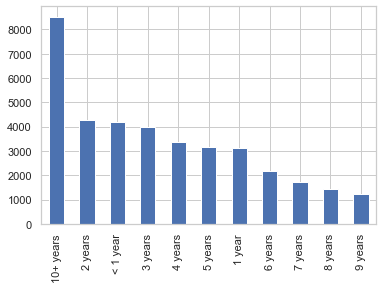

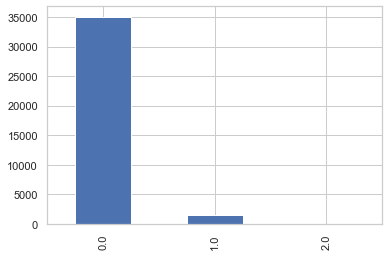

count    37143.000000
mean        49.155014
std         28.216397
min          0.000000
25%         26.000000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

In [1569]:
dfloan1.emp_length.value_counts().plot.bar()
plt.show()

dfloan1.pub_rec_bankruptcies.value_counts().plot.bar()
plt.show()

dfloan1.revol_util.str.replace('%','').astype(float).describe()

### It shows that employees having 10+ years of experience has applied for loans even  0 bankruptcies for most of the customers , revolving utilization contains 0.11 % null values  with standard deviation of 28. Hence for these null values can be removed


In [1570]:
dfloan1= dfloan1[~dfloan1.emp_length.isnull()]
dfloan1 = dfloan1[~dfloan1.pub_rec_bankruptcies.isnull()]
dfloan1 = dfloan1[~dfloan1.revol_util.isnull()]


In [1571]:
# We can convert the employment length to numeric

dfloan1['emp_length'] = dfloan1['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
dfloan1['emp_length'] = dfloan1['emp_length'].apply(lambda x: pd.to_numeric(x))

In [1572]:
# Converting revolving balance, dti into numeric

dfloan1['revol_bal'] = dfloan1['revol_bal'].apply(lambda x: pd.to_numeric(x))
dfloan1['dti'] = dfloan1['dti'].apply(lambda x: pd.to_numeric(x))

In [1573]:
ColsOverview(dfloan1)

,colName,dtypes,Missingval,UniqueVal,TopVal
0,id,int64,0,36433,1052670
1,member_id,int64,0,36433,745584
2,loan_amnt,int64,0,863,10000
3,funded_amnt,int64,0,1024,10000
4,funded_amnt_inv,float64,0,7474,5000
5,term,object,0,2,36 months
6,int_rate,object,0,334,10.99%
7,installment,float64,0,14367,311.11
8,grade,object,0,7,B
9,sub_grade,object,0,35,B3


In [1574]:
dfloan1.shape

(36433, 43)

## Now we have cleaned all the null values , lets take copy of dfloan1 to dfloan2 for further analysis

In [1575]:
dfloan2 = dfloan1.copy()
dfloan2.shape

(36433, 43)

In [1576]:
dfloan2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


# Univariate Analysis

Univariate analysis on categorical parameters

In [1577]:
# Defining a common function to plot graphs for univariate analysis

def plotUnivariate(dataFrameName, categorical_var, graphTitle, xLabel, yLabel, rotation, figsize_x, figsize_y, order_list=None):
    plt.figure(figsize=(figsize_x,figsize_y))
    sns.countplot(x=categorical_var, data=dataFrameName, order=order_list)    
    plt.title(graphTitle, fontsize=16)
    plt.ylabel(yLabel, fontsize=12)
    plt.xlabel(xLabel, fontsize=12)
    plt.xticks(rotation = rotation)
    plt.show();

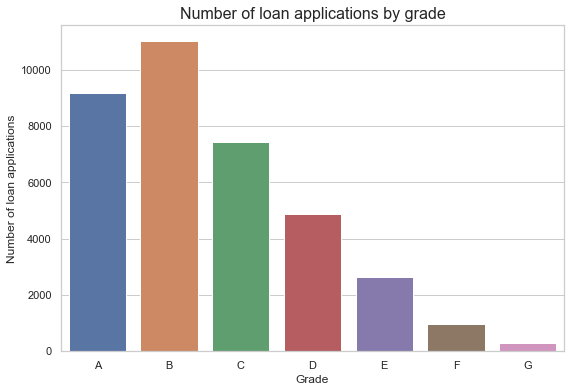

In [1578]:
# Plotting grade against the number of loan applications

sorted_list = sorted(dfloan2.grade.value_counts().index.tolist())

plotUnivariate(dfloan2, 'grade', 'Number of loan applications by grade', 'Grade', 'Number of loan applications', 0, 9, 6, sorted_list)

#### Observations:

##### The maximum number of loan applications are done by Grade B closely followed by Grade A and Grade C.
##### The lowest number of loan applications are done by Grade G.
##### It can also be observed that as the Grade goes from A to G, the number of loan application goes down considerably.

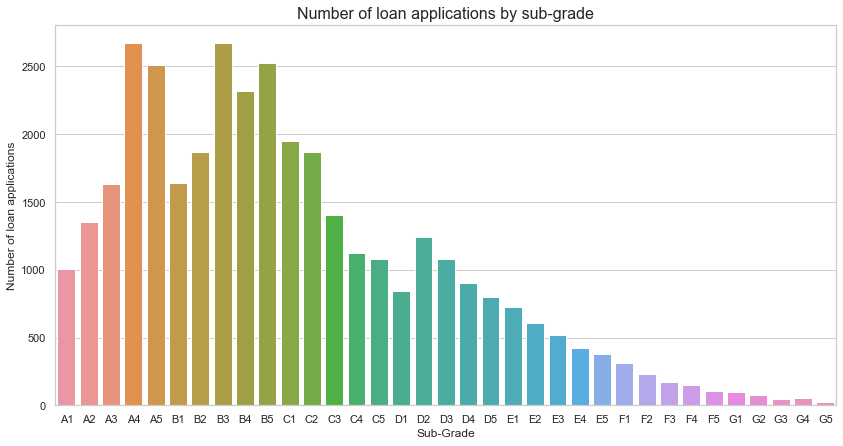

In [1579]:
# Plotting sub-grade against the number of loan applications

sorted_list = sorted(dfloan2.sub_grade.value_counts().index.tolist())

plotUnivariate(dfloan2, 'sub_grade', 'Number of loan applications by sub-grade', 'Sub-Grade', 'Number of loan applications', 0, 14, 7, sorted_list)

It can be observed that there is a steady decrease in the number of loan applications from Grade C to Grade G

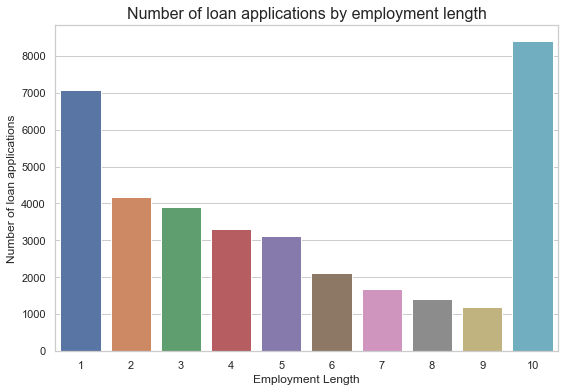

In [1580]:
# Plotting grade against the number of loan applications

sorted_list = sorted(dfloan2.emp_length.value_counts().index.tolist())

plotUnivariate(dfloan2, 'emp_length', 'Number of loan applications by employment length', 'Employment Length', 'Number of loan applications', 0, 9, 6, sorted_list)

It can be observed that more or less the number of loan applications steadily goes down as the employment duration increases. 
However, the ones with more than 10 years of employment is the exceptional case as it constitutes the majoirty of the loan applications

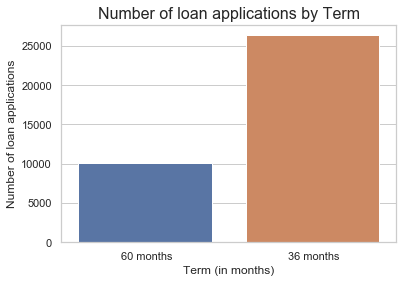

In [1581]:
# Plotting term against the number of loan applications

plotUnivariate(dfloan2, 'term', 'Number of loan applications by Term', 'Term (in months)', 'Number of loan applications', 0, 6, 4)

It can be observed that majority of loan applications are made for shorter term

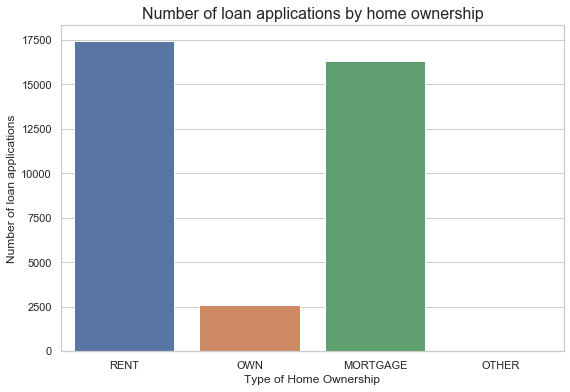

In [1582]:
# Plotting type of home ownership against the number of loan applications

plotUnivariate(dfloan2, 'home_ownership', 'Number of loan applications by home ownership', 'Type of Home Ownership', 'Number of loan applications', 0, 9, 6)

It can be observed that majoirty of applications are made by borrowers who does not own their home.

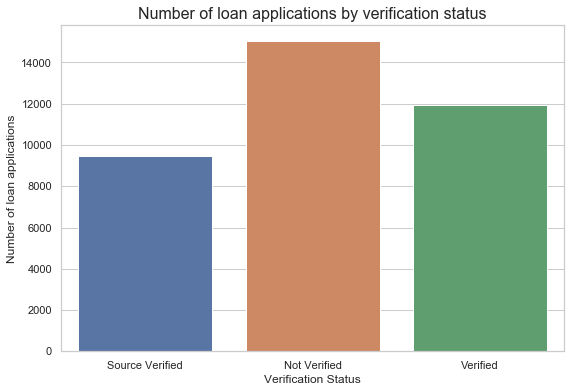

In [1583]:
# Plotting verification status against the number of loan applications

plotUnivariate(dfloan2, 'verification_status', 'Number of loan applications by verification status', 'Verification Status', 'Number of loan applications', 0, 9, 6)

It can be observed that for majoirty of the loan applications, the income was not verified by LC (Lending Club). 
Income verification would require the borrower to furnish documents like paystubs, IRS Forms W-2, or other tax records

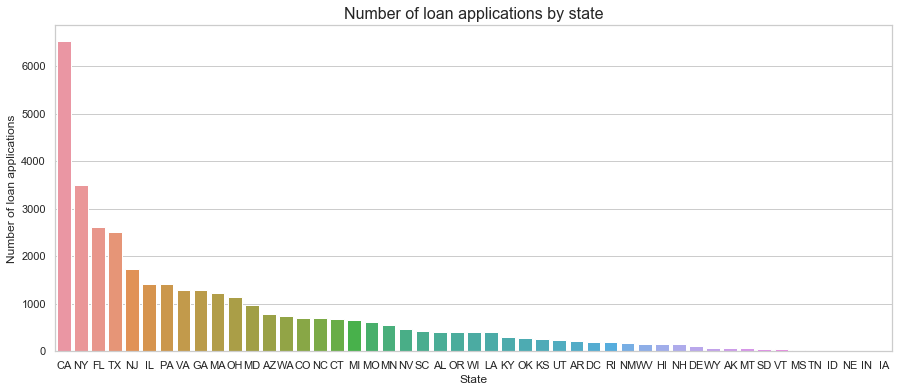

In [1584]:
# Plotting state address against the number of loan applications

sorted_list = dfloan2.addr_state.value_counts().index.tolist()

plotUnivariate(dfloan2, 'addr_state', 'Number of loan applications by state', 'State', 'Number of loan applications', 0, 15, 6, sorted_list)

It can be observed that majoirty of the loan applications are made in the mega cities of United States like California, 
New York, Florida. However, the most number of loan applications come from California

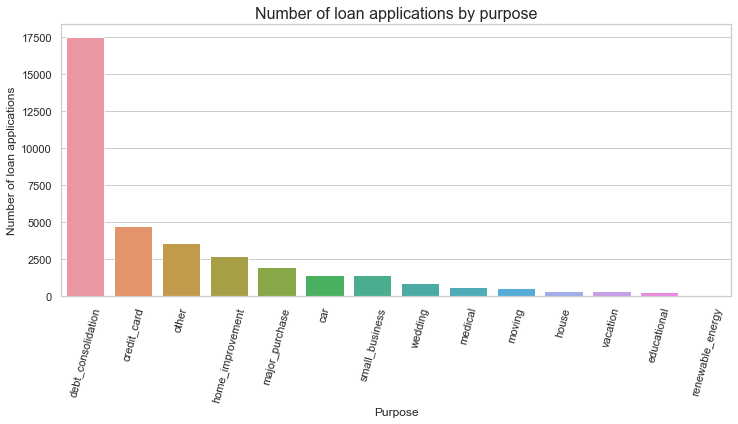

In [1585]:
# Plotting purpose against the number of loan applications

sorted_list = dfloan2.purpose.value_counts().index.tolist()

plotUnivariate(dfloan2, 'purpose', 'Number of loan applications by purpose', 'Purpose', 'Number of loan applications', 75, 12, 5, sorted_list)

It can be observed that most of the loan applications are made for debt consolidation. 
i.e. Majority of the loan applications are made to pay off other loans

In [1586]:
# Creating the drevied column for month and year from the issue_d (Issue Date) column to understand the data month-wise as well as year-wise.
# This new month and year column would be our type driven metric

# Formatting the values in the issue_d column

from datetime import datetime
dfloan2['issue_d'] = dfloan2['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

# extracting month and year from issue_d and storing in the derived column month and year respectively
dfloan2['month'] = dfloan2['issue_d'].apply(lambda x: x.month)
dfloan2['year'] = dfloan2['issue_d'].apply(lambda x: x.year)

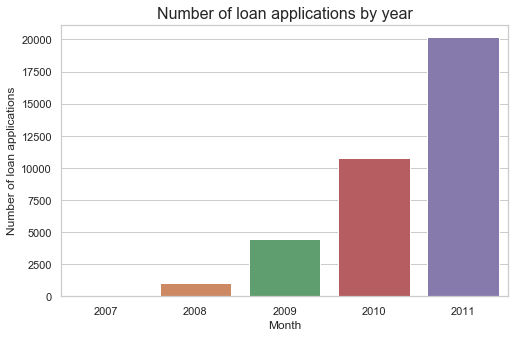

In [1587]:
# Plotting year of issuing loan against the number of loan applications

sorted_list = sorted(dfloan2.year.value_counts().index.tolist())

plotUnivariate(dfloan2, 'year', 'Number of loan applications by year', 'Month', 'Number of loan applications', 0, 8, 5, sorted_list)

It can be observed the that lending clubs are processing more and more number of loan applications as the years progresses

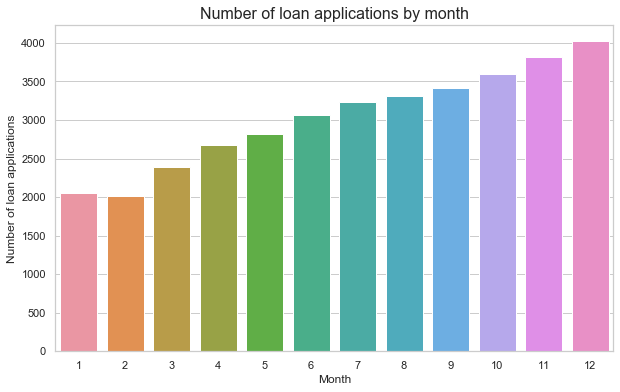

In [1588]:
# Plotting month of issuing loan against the number of loan applications

sorted_list = sorted(dfloan2.month.value_counts().index.tolist())

plotUnivariate(dfloan2, 'month', 'Number of loan applications by month', 'Month', 'Number of loan applications', 0, 10, 6, sorted_list)

It can be observed thayt most number of loan applications are made in the month of December.

It can also be observed that as the year progresses, the number of loan applications increases.

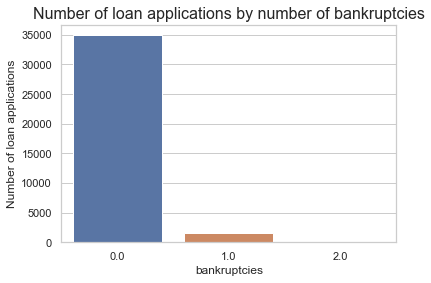

In [1589]:
# plotting bankruptcies against number of loan applications

plotUnivariate(dfloan2, 'pub_rec_bankruptcies', 'Number of loan applications by number of bankruptcies', 'bankruptcies', 'Number of loan applications', 0, 6, 4)

### As we can see for most of the people has no  public bankruptcies records

In [1590]:
def plotboxonevar(df, graphTitle, figsize_x, figsize_y ):
    plt.figure(figsize=[figsize_x,figsize_y])
    plt.title(graphTitle, fontsize=16)
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=df )
    plt.show()

In [1591]:
def snsdist(df, graphTitle, bins, figsize_x, figsize_y ):
    plt.figure(figsize=[8,6])
    plt.title(graphTitle, fontsize=16)
    sns.distplot(df ,norm_hist=False,kde=False,  bins= bins ,hist_kws={"alpha": 1} ).set( ylabel='Count');
    plt.show()
    

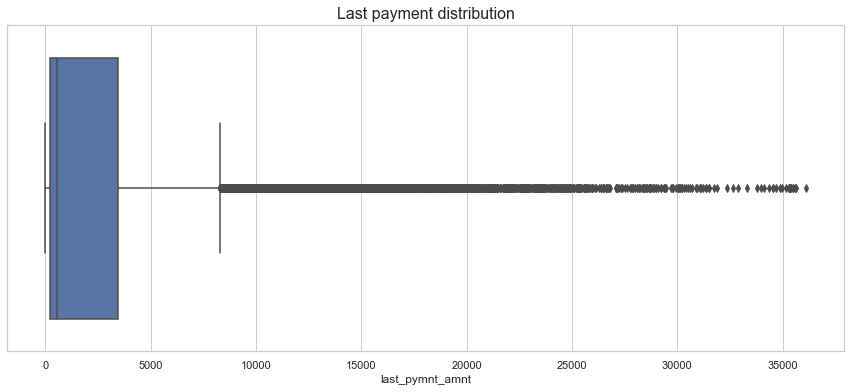

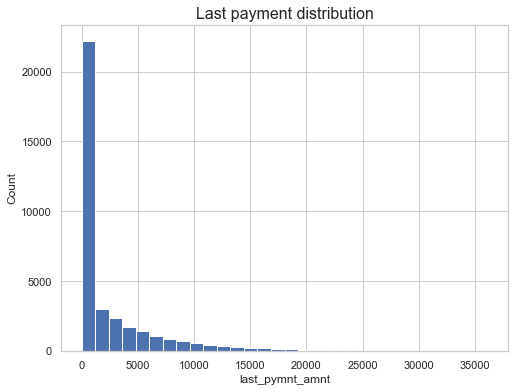

count    36433.000000
mean      2742.955476
std       4473.528922
min          0.010000
25%        226.280000
50%        571.700000
75%       3457.580000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

In [1592]:
# checking the distribution of last payment 
plotboxonevar(dfloan2["last_pymnt_amnt"] , 'Last payment distribution', 15 , 6)
snsdist(dfloan2["last_pymnt_amnt"] , 'Last payment distribution', 30,  6 , 4)
dfloan2["last_pymnt_amnt"].describe()

#### As we can see most of the people tends to pay less amount , 75% values beyond 3457 and max value is 36k.

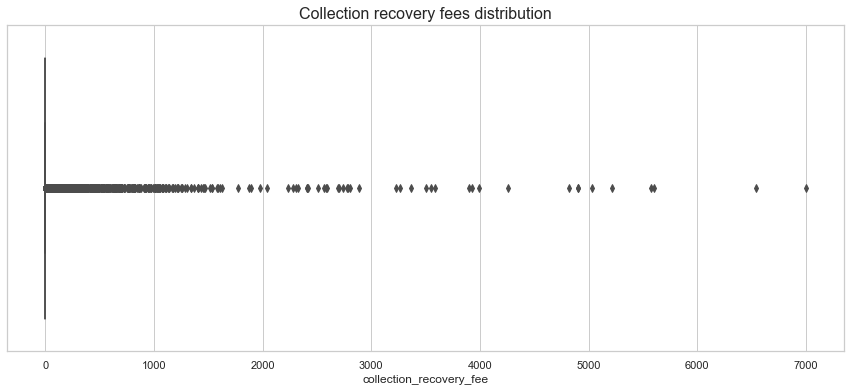

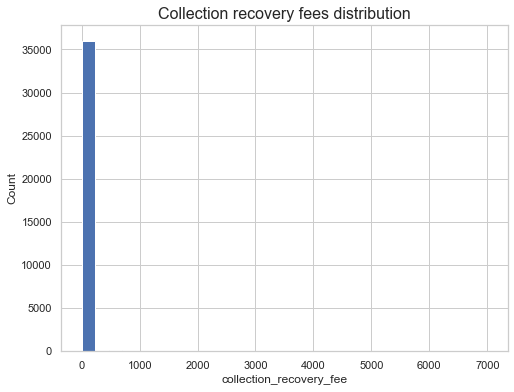

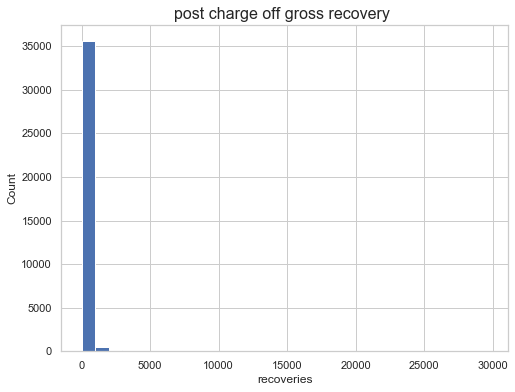

,collection_recovery_fee,recoveries
count,36433.000000,36433.000000
mean,11.677065,92.855490
std,140.880327,682.047187
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,7002.190000,29623.350000


In [1593]:
#checking collection recovery fees distribution 
plotboxonevar(dfloan2["collection_recovery_fee" ] , 'Collection recovery fees distribution', 15 , 6)
snsdist(dfloan2["collection_recovery_fee"] , 'Collection recovery fees distribution', 30,  6 , 4)
dfloan2["collection_recovery_fee"].describe()
snsdist(dfloan2["recoveries"] , 'post charge off gross recovery ', 30,  6 , 4)
dfloan2[["collection_recovery_fee","recoveries" ]].describe()


#### In most of the loan there is no recovery  or may be we can say not required , further analysis could be done in segmented  univariate for charged off loans

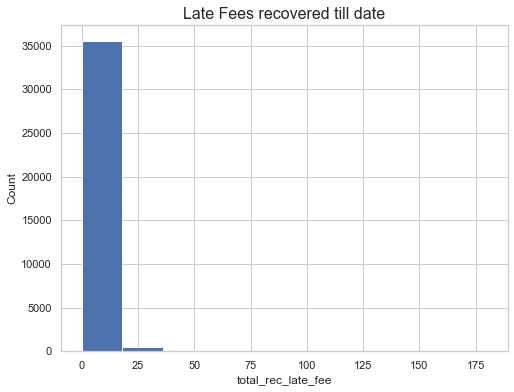

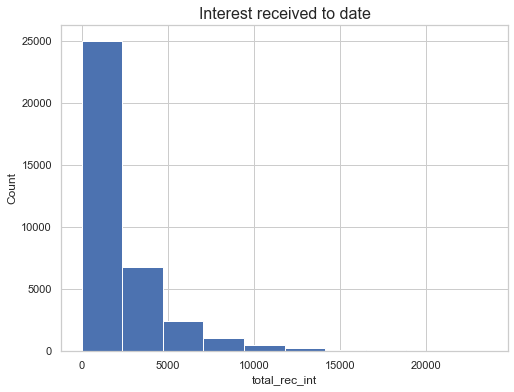

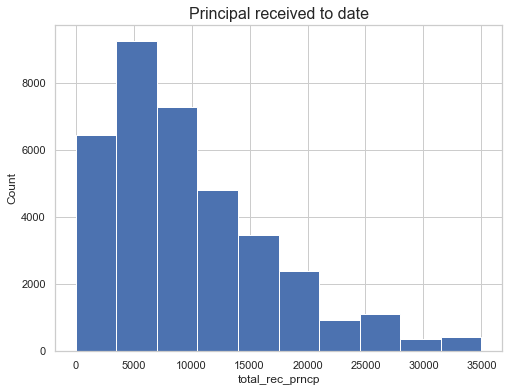

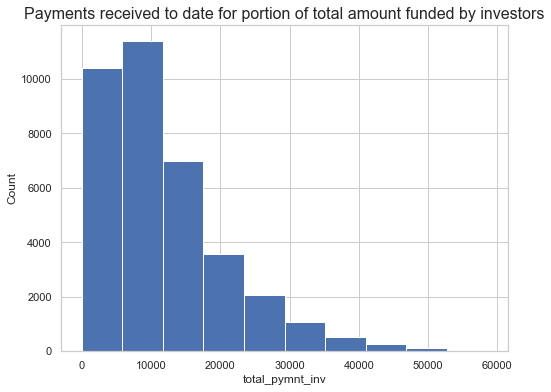

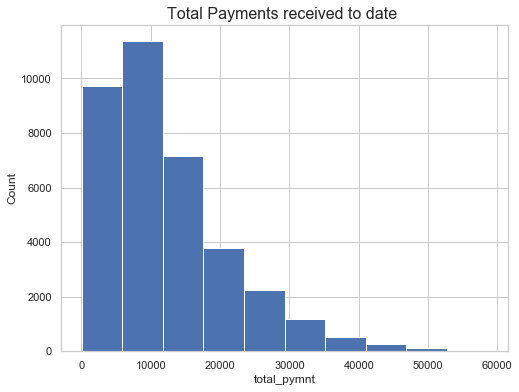

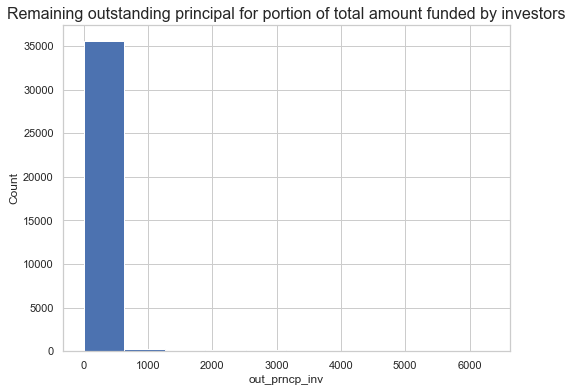

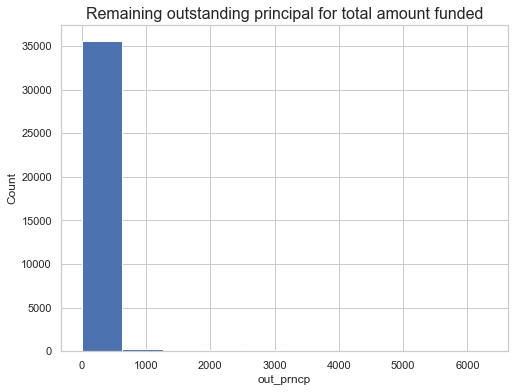

,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp
count,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,1.299840,2304.404937,9912.408471,11841.070656,12310.968657,52.213313,52.465692
std,7.065629,2629.542911,7053.212865,8911.319070,9048.420885,378.443825,379.850844
min,0.000000,6.220000,0.000000,0.000000,33.730000,0.000000,0.000000
25%,0.000000,678.010000,4800.000000,5413.410000,5672.557913,0.000000,0.000000
50%,0.000000,1379.820000,8123.600000,9632.040000,10101.589360,0.000000,0.000000
75%,0.000000,2891.860000,14000.000000,16094.490000,16700.719980,0.000000,0.000000
max,180.200000,23563.680000,35000.020000,58563.680000,58563.679930,6307.370000,6311.470000


In [1594]:
# Analysing total recovery late fees 
snsdist(dfloan2["total_rec_late_fee"] , 'Late Fees recovered till date', 10,  6 , 4)
snsdist(dfloan2["total_rec_int"] , 'Interest received to date', 10,  6 , 4)
snsdist(dfloan2["total_rec_prncp"] , 'Principal received to date', 10,  6 , 4)
snsdist(dfloan2["total_pymnt_inv"] , 'Payments received to date for portion of total amount funded by investors', 10,  6 , 4)
snsdist(dfloan2["total_pymnt"] , 'Total Payments received to date ', 10,  6 , 4)
snsdist(dfloan2["out_prncp_inv"] , 'Remaining outstanding principal for portion of total amount funded by investors', 10,  6 , 4)
snsdist(dfloan2["out_prncp"] , 'Remaining outstanding principal for total amount funded', 10,  6 , 4)

dfloan2[["total_rec_late_fee" , "total_rec_int" ,"total_rec_prncp","total_pymnt_inv","total_pymnt" ,"out_prncp_inv" , "out_prncp"]].describe()

### Observations:
   - for 75% of loan customers there is no late fees. further analysis can be done on segmented univairate
   - for 75% customers interest received is less than 2900 , huge variation bw median and mean
   - principal received , total payment and payment portion for investers seems to be normally distributed . Hence most of the       money has been recovered  , more information to be checked for segmented
   - Around 75% loan customers has no outstanding balance  and mean outstanding balance is around 52 dollars.

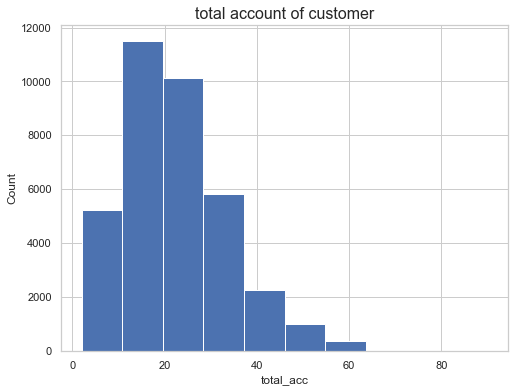

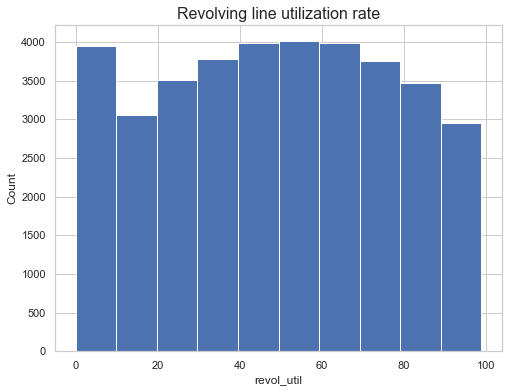

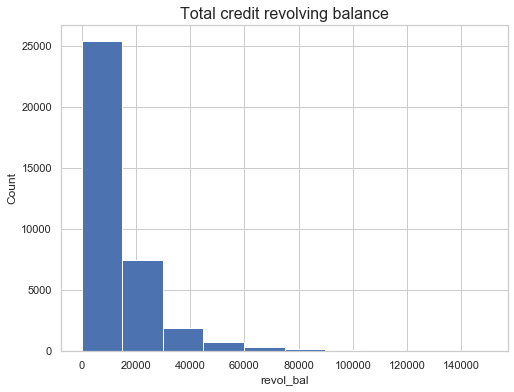

,total_acc,revol_util,revol_bal
count,36433.000000,36433.000000,36433.000000
mean,22.245876,48.836604,13465.657481
std,11.376692,28.172054,15702.093047
min,2.000000,0.000000,0.000000
25%,14.000000,26.000000,3832.000000
50%,21.000000,49.000000,9030.000000
75%,29.000000,72.000000,17231.000000
max,90.000000,99.000000,149588.000000


In [1595]:
# Analyzing the total account and revolving utilization
snsdist(dfloan2["total_acc"] , 'total account of customer', 10,  6 , 4)
#converting revol_util to float 
#dfloan2['revol_util1'] =dfloan2['revol_util'].str.replace('%','').astype(float)
# using regular expression to extract numeric values from the string
import re
dfloan2['revol_util'] = dfloan2['revol_util'].apply(lambda x: float(re.findall('\d+', str(x))[0]))

snsdist(dfloan2['revol_util'] , 'Revolving line utilization rate', 10,  6 , 4)
snsdist(dfloan2['revol_bal'] , 'Total credit revolving balance', 10,  6 , 4)

dfloan2[['total_acc', 'revol_util' , 'revol_bal']].describe()


###  Univariate Insights on total account and revolving utilization
   - Average loan customers have around 21 to 22 total accounts 
   - Most of the cusotmers have revolving balance utilization of around 49% . as we know lesser the utilization , better will        be credit score
   - 75% customers has revolving balance less than 17232 and there is huge difference be mean and median
    

,pub_rec,open_acc,inq_last_6mths,delinq_2yrs
count,36433.000000,36433.000000,36433.00000,36433.000000
mean,0.053715,9.351604,0.86493,0.146131
std,0.234995,4.373772,1.06343,0.492199
min,0.000000,2.000000,0.00000,0.000000
25%,0.000000,6.000000,0.00000,0.000000
50%,0.000000,9.000000,1.00000,0.000000
75%,0.000000,12.000000,1.00000,0.000000
max,4.000000,44.000000,8.00000,11.000000


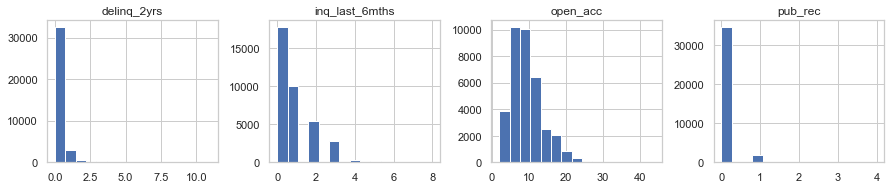

In [1596]:
#analyzing below columns
dfloan2[['pub_rec' ,'open_acc','inq_last_6mths' ,'earliest_cr_line', 'delinq_2yrs' ]].hist(bins=15, figsize=(15, 6), layout=(2, 4));
dfloan2[['pub_rec' ,'open_acc','inq_last_6mths' ,'earliest_cr_line', 'delinq_2yrs' ]].describe()

### Univariate Analysis Insights  on public Records , open accounts, credit inquiries , delinq
   - Most of the loan customers has no public derogatory records 
   - 50% people has open accounts b/w 6 to 12  , with average and median of 9 accounts
   - 75 % people has no credit enquiries in last 6 months
   - in past 2 years most of the loan customers has no delinquency Avergae os 0.14 and max is 11 . 

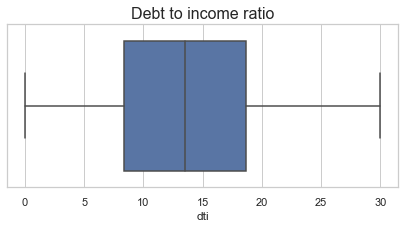

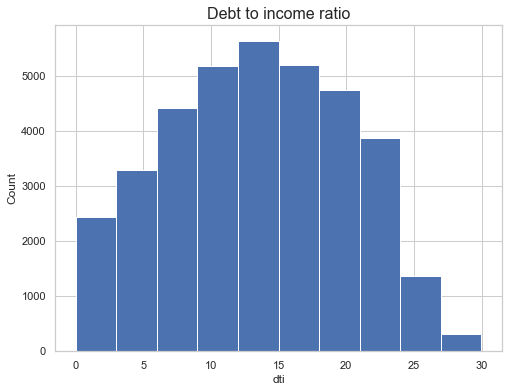

,dti
count,36433.000000
mean,13.444131
std,6.643308
min,0.000000
25%,8.360000
50%,13.540000
75%,18.690000
max,29.990000


In [1597]:
# Analyzing the important column Debt to income ratio dti 
plotboxonevar(dfloan2["dti"] , 'Debt to income ratio',7 , 3)
snsdist(dfloan2['dti'] , 'Debt to income ratio', 10,  7 , 3)
dfloan2[['dti']].describe()

### Debt to income ratio is normally distributed . 75% loan customer have dti less than 19%

# Driver analysis
-  As we know that our objective is to find out the main drivers  which provide strong indication of deafulting a loan    
   application.
-  we can see that there different categories of columns related to loan applicant  like its name age , employment etc then     
   related to loan like loan amount , installement rate , grade , subgrade etc . and columns post loan is assigned like 
   recoveries , toal payment received , last payment date etc.
-  post assigned loan columns can be excluded now from the analysis as these will not help in predicting the default loan

   

In [1598]:
# we can see below are the post assigned columns excluding id and member id also as these columns are unique 
postassignedloancols = [
'id',
'member_id',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
'inq_last_6mths',
'delinq_2yrs',
]
dfloan3 = dfloan2.loc[:,~dfloan2.columns.isin(postassignedloancols)]


In [1599]:
ColsOverview(dfloan3)

,colName,dtypes,Missingval,UniqueVal,TopVal
0,loan_amnt,int64,0,863,10000
1,funded_amnt,int64,0,1024,10000
2,funded_amnt_inv,float64,0,7474,5000
3,term,object,0,2,36 months
4,int_rate,object,0,334,10.99%
5,installment,float64,0,14367,311.11
6,grade,object,0,7,B
7,sub_grade,object,0,35,B3
8,emp_title,object,0,28207,US Army
9,emp_length,int64,0,10,10


In [1600]:
#There are 3 categories of loan status
dfloan3.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

In [1601]:
# Current loan status can be excluded from analysis as it will not add any value as user is still availing loan 
# we will be analyzing either fully paid loans or default loans .
dfloan3 = dfloan3[dfloan3.loan_status!='Current']
dfloan3.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [1602]:
#Converting fully paid and charged off to 0 and 1
dfloan3.loan_status = dfloan3.loan_status.apply(lambda x : 0 if x=='Fully Paid' else 1)
#converting to numeric 
dfloan3.loan_status = dfloan3.loan_status.apply(lambda x :pd.to_numeric(x))
#checking the default percentage 
print(dfloan3.loan_status.value_counts())


0    30424
1     4943
Name: loan_status, dtype: int64


In [1603]:
# checking the fully paid and default percentage which is 86% and 14 %
print( [ round(i/len(dfloan3.index) , 3) for i in dfloan3.loan_status.value_counts().tolist()])


[0.86, 0.14]


In [1604]:
#Creating unique function to plot the loan status vs loan amount 
def plotbaragainstloanStatus(xvar, graphTitle, rotation = 0, order_list=None) :   
    #plt.figure(figsize=(7,5))
    sns.barplot(x=xvar , y = dfloan3.loan_status, order=order_list)
    plt.title(graphTitle, fontsize=16)
    #plt.ylabel('Loan Status', fontsize=12)
    #plt.xlabel(xLabel, fontsize=12)
    plt.xticks(rotation = rotation)
    plt.show();

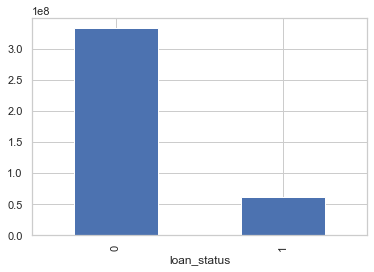

In [1605]:
# we can see more amount for fully paid
dfloan3.groupby('loan_status')['loan_amnt'].sum().plot.bar()
plt.show()

In [1606]:
#To plot numerical with categorical , we can divide the amount in buckets 
def loanamtbuckets(x):
    if x<=5000:
        return 'Low Amount'
    if 5000<x<=10000:
        return 'Medium Amount'
    if 10000<x<=20000:
        return 'High Amount'
    else:
        return'Very High'

In [1607]:
#calling function loanamtbuckets to divide the amount in categorical variables,creating another categorical columns loan_amt_cat
dfloan3['loan_amnt_cat']= dfloan3.loan_amnt.apply( lambda x: loanamtbuckets(x))

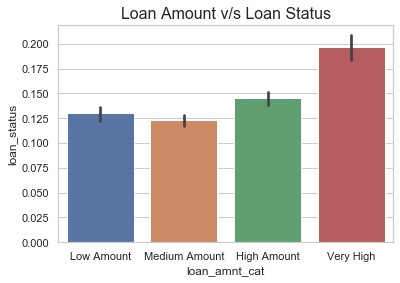

In [1608]:
#now we can plot loan amount with loan status. we can clearly see that loan amount > 20000 has high default rate
plotbaragainstloanStatus(dfloan3.loan_amnt_cat ,'Loan Amount v/s Loan Status')

In [1609]:
#similarly converting funded amount to categories, creating another columns funded_amt_cat
dfloan3['funded_amnt_cat']= dfloan3.funded_amnt.apply( lambda x: loanamtbuckets(x))

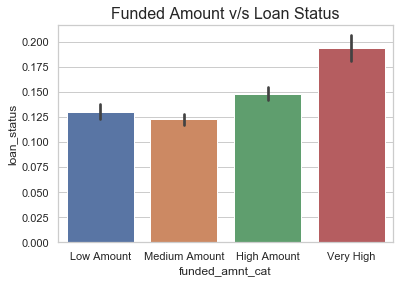

In [1610]:
#now we can plot funded amount with loan status. we can clearly see that loan amount > 20000 has high default rate
plotbaragainstloanStatus(dfloan3.funded_amnt_cat ,'Funded Amount v/s Loan Status')

In [1611]:
#similarly converting funded_amnt_inv (amount commited by investers) to categories , creating another col funded_amnt_inv_cat 
dfloan3['funded_amnt_inv_cat']= dfloan3.funded_amnt_inv.apply( lambda x: loanamtbuckets(x))

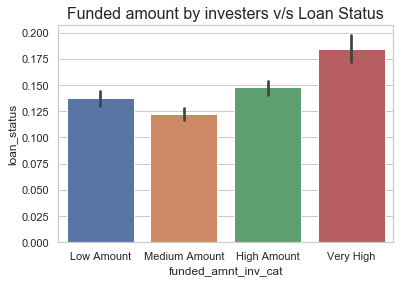

In [1612]:
# results are similar to loan amount and funded amount, high loan default rate for very high funded amountby investers
plotbaragainstloanStatus(dfloan3.funded_amnt_inv_cat ,'Funded amount by investers v/s Loan Status')

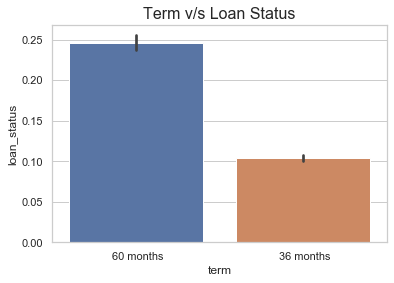

In [1613]:
# ploting term vs Loan status
plotbaragainstloanStatus(dfloan3.term ,'Term v/s Loan Status')

 we can see that loan with 60 months term are more defaulted, which means users who opt for less term are better

In [1614]:
# interest rate  relation with loan status 
# Extracting only float value from interest rate  
dfloan3.int_rate = dfloan3.int_rate.apply(lambda x: float(re.findall('\d+\.\d+', str(x))[0]))

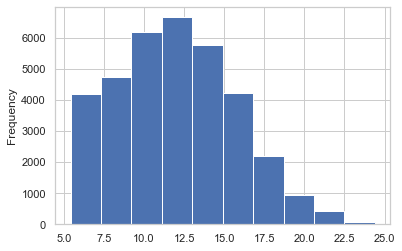

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [1615]:
# We can see that most of the loan users interest rate bw 10 to 15 %
dfloan3.int_rate.apply(lambda x: float(re.findall('\d+\.\d+', str(x))[0])).plot.hist()
plt.show()
dfloan3.int_rate.describe()

In [1616]:
# Binning of interest rate by qcut  ,creating new column int_rate_cat for categories
dfloan3['int_rate_cat'] = pd.qcut(dfloan3.int_rate, [0 , 0.20 , 0.40, 0.60,0.80, 1 ] ,[ 'VL' , 'L' , 'M' ,'H' , 'VH'])

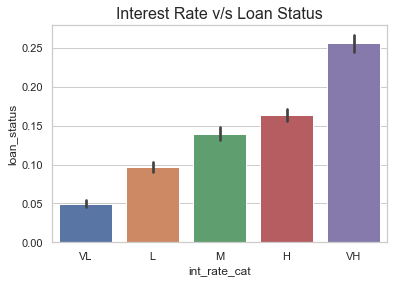

In [1617]:
#plotting interestrate with loan status # Users with high interest rate are defaulty
plotbaragainstloanStatus(dfloan3.int_rate_cat ,'Interest Rate v/s Loan Status')

loan customers with high interest rate are more defaulty . As the Interest rate is increasing , we can see loan default is also increasing. hence strong relation bw these 2 

In [1618]:
#pivot table also shows that for VH interest rate .. there are more chance of loan status to be defaulted
pd.pivot_table(dfloan3 , values = 'loan_status' ,  columns='int_rate_cat')

int_rate_cat,VL,L,M,H,VH
loan_status,0.049508,0.096244,0.139581,0.163716,0.255847


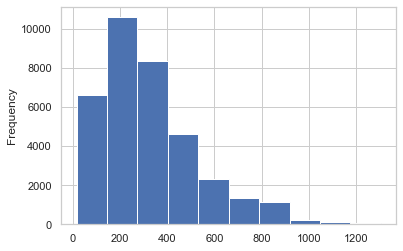

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

In [1619]:
#checking the distribution of installment , most of the installment are bw 200 to 400 
dfloan3.installment.plot.hist()
plt.show()
dfloan3.installment.describe()

In [1620]:
# lets do binning of installment by qcut , creating new columns installment_cat
dfloan3['installment_cat'] = pd.qcut(dfloan3.installment, [0 , 0.20 , 0.40, 0.60,0.80, 1 ] ,[ 'VL' , 'L' , 'M' ,'H' , 'VH'])

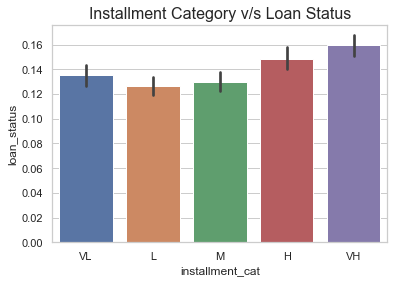

In [1621]:
#plotting installment with loan status # there are not much changes bw all the installment buckets 
#but loans with high Installments seems to be more defaulted
plotbaragainstloanStatus(dfloan3.installment_cat ,'Installment Category v/s Loan Status')

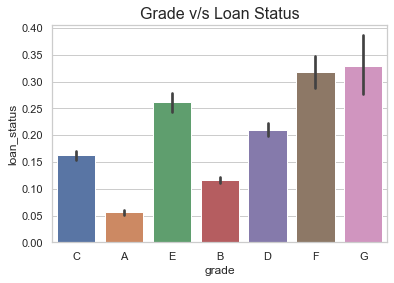

In [1622]:
#plotting grade with loan status. Univariate segmented analysis shows that no of loan applicatin for G grade were higest 
# hence number of default are also high for G grade followed by F and E
plotbaragainstloanStatus(dfloan3.grade ,'Grade v/s Loan Status')


In [1623]:
#pivot table to see the exact value of grades , 33% of grade G applications are defaulted. It seems to be strong indicater
pd.pivot_table(dfloan3 , values = 'loan_status' ,  columns='grade')

grade,A,B,C,D,E,F,G
loan_status,0.056127,0.116906,0.16293,0.210165,0.261185,0.317073,0.329787


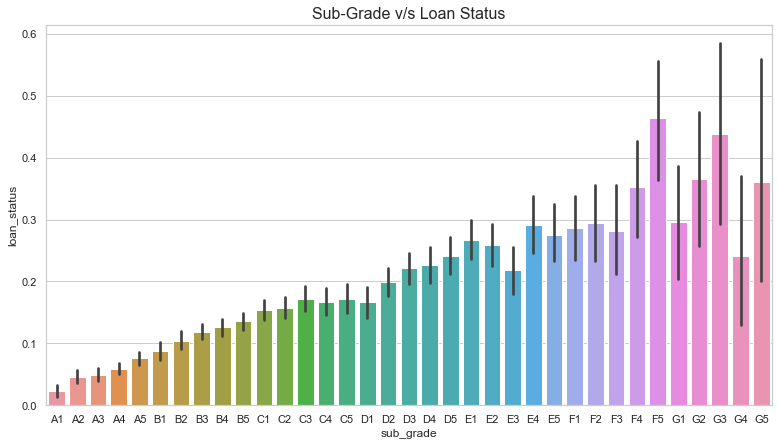

In [1624]:
#loan with f5 grade are more defaulty followed by G3 and G2, this also seems to be strong indicator as
# 45% of loans are default for F5 grade

sorted_list = sorted(dfloan3.sub_grade.value_counts().index.tolist())

plt.figure(figsize=[13,7])
plotbaragainstloanStatus(dfloan3.sub_grade ,'Sub-Grade v/s Loan Status', 0, sorted_list)
plt.show()

In [1625]:
dfloan3.emp_title.str.upper().value_counts()

US ARMY                       202
BANK OF AMERICA               131
AT&T                           77
WALMART                        77
IBM                            67
                             ... 
AT AND T LABS                   1
SUNRISE TECHNOLOGY SYSTEMS      1
MEDSOL NURSES                   1
BENTLEY SYSTEMS INC             1
PROPARK INC.                    1
Name: emp_title, Length: 26119, dtype: int64

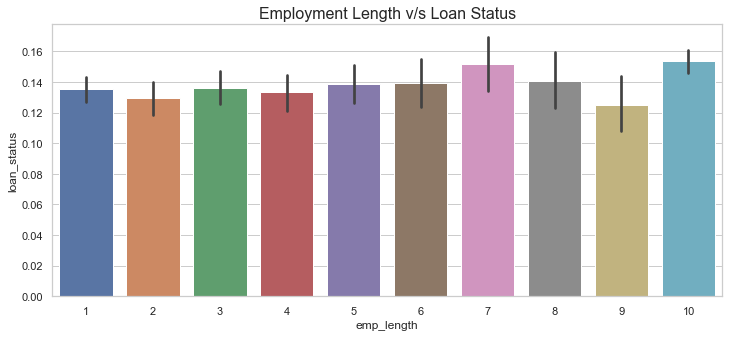

In [1626]:
#checking distribution of employee length. Default rate looks constant for most of the employee expereince.
#However customer with 10+ years have slightly more default rate .. as they are the highest loan customers in our dataset
plt.figure(figsize=[12,5])
plotbaragainstloanStatus(dfloan3.emp_length ,'Employment Length v/s Loan Status' )
plt.show()

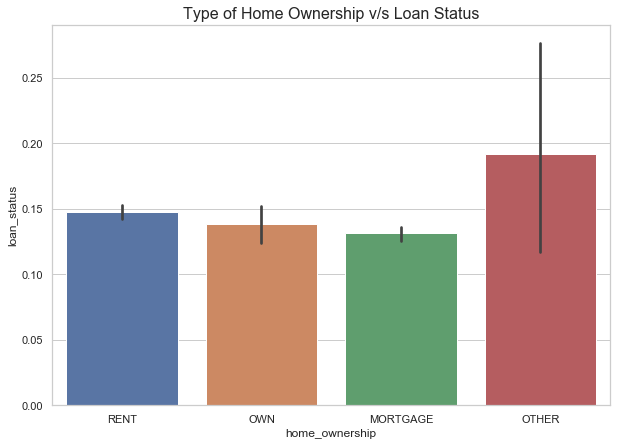

In [1627]:
# Home ownership :-  Other loan customer are  more defaulter followed by Rented one
plt.figure(figsize=[10,7])
plotbaragainstloanStatus(dfloan3.home_ownership ,'Type of Home Ownership v/s Loan Status' )
plt.show()

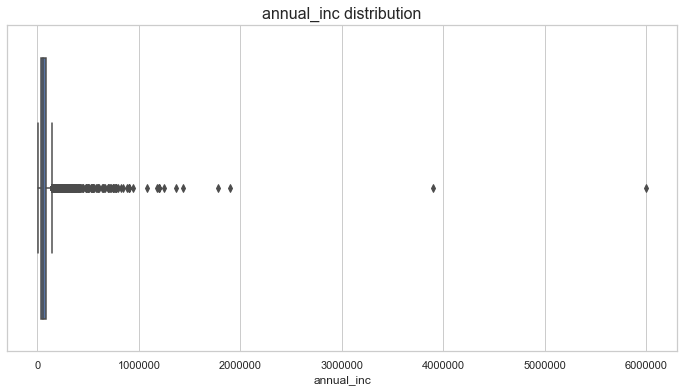

count      35367.000000
mean       69095.985393
std        63967.047428
min         4000.000000
0%          4000.000000
10%        30000.000000
20%        38004.000000
30%        45000.000000
40%        51000.000000
50%        60000.000000
60%        66000.000000
80%        90000.000000
100%     6000000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [1628]:
#checking the distribution of employee income
plotboxonevar(dfloan3["annual_inc"] , 'annual_inc distribution', 12 , 6)
dfloan3.annual_inc.describe( percentiles = [0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.8, 1]).apply(lambda x: format(x, 'f'))

In [1629]:
# lets do binning of annual income by qcut 10% ,10 to 30 % , 30 -60 , 60-80 and 80 -100 ,creating new column anual_inc_cat
dfloan3['annual_inc_cat'] = pd.qcut(dfloan3.annual_inc, [0 , 0.10 , 0.30, 0.60,0.80, 1 ] ,[ 'VL' , 'L' , 'M' ,'H' , 'VH'])

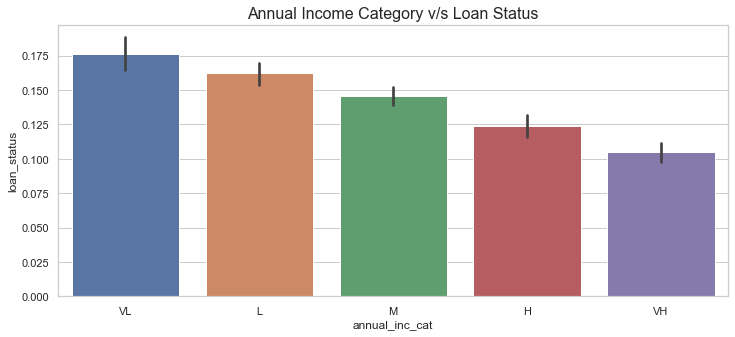

In [1630]:
# we can clearly see strong indication of annual income with loan status . people with very low income tends to 
# be defaulty. 
plt.figure(figsize=[12,5])
plotbaragainstloanStatus(dfloan3.annual_inc_cat ,'Annual Income Category v/s Loan Status' )
plt.show()

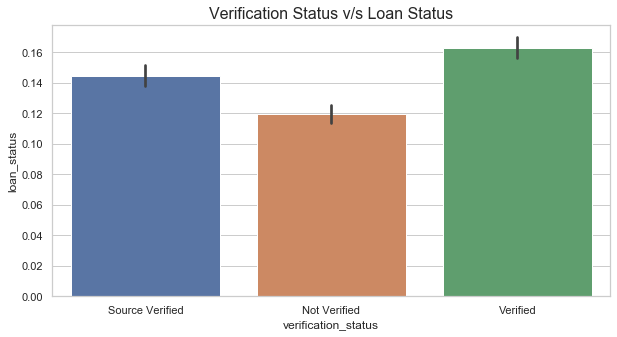

In [1631]:
#Verification vs Loan Status . surprisingly verified loan customer are more defaulty followed by source verified and not verified
plt.figure(figsize=[10,5])
plotbaragainstloanStatus(dfloan3.verification_status ,'Verification Status v/s Loan Status' )
plt.show()


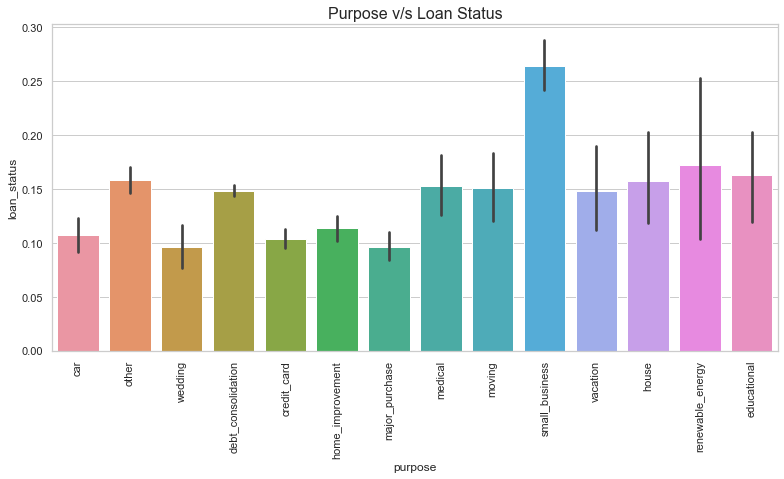

In [1679]:
# Plotting the purpose of the loan against the loan status

plt.figure(figsize=[13,6])
plotbaragainstloanStatus(dfloan3.purpose ,'Purpose v/s Loan Status', 90)
plt.show()

### Observations:

#### It can be observed that borrowers applying for the small business loan are the ones that default the most.

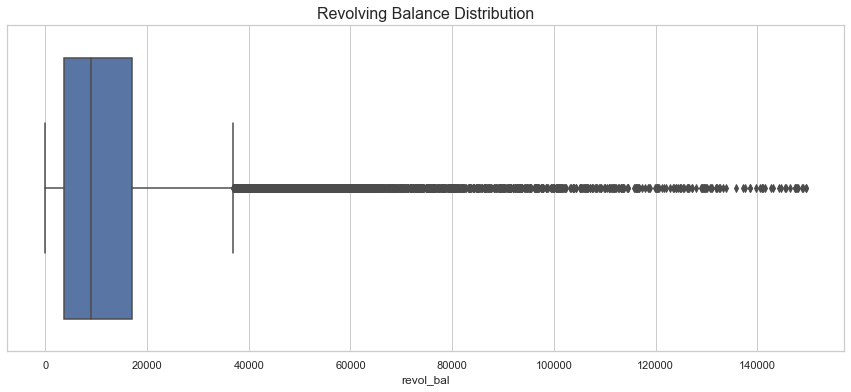

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
0%            0.000000
10%        1181.600000
20%        2902.200000
30%        4713.000000
40%        6675.400000
50%        8934.000000
60%       11546.000000
70%       14880.200000
80%       19730.000000
90%       29042.000000
100%     149588.000000
max      149588.000000
Name: revol_bal, dtype: object

In [1633]:
#checking the distribution of borrower's revolving balance

plotboxonevar(dfloan3.revol_bal , 'Revolving Balance Distribution', 15 , 6)
dfloan3.revol_bal.describe( percentiles = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).apply(lambda x: format(x, 'f'))

In [1634]:
# Categorizing Revolving Balance

def revol_balance(n):
    if n <= 2900:
        return 'Very Low'
    elif n > 2901 and n <= 6675:
        return 'Low'
    elif n > 6676 and n <= 11545:
        return 'Medium'
    elif n > 11546 and n <= 19730:
        return 'High'
    else:
        return 'Very High'

In [1635]:
#calling function revol_balance to divide the amount in categorical variables, creating another categorical columns revol_bal_cat

dfloan3['revol_bal_cat'] = dfloan3['revol_bal'].apply(lambda x: revol_balance(x))


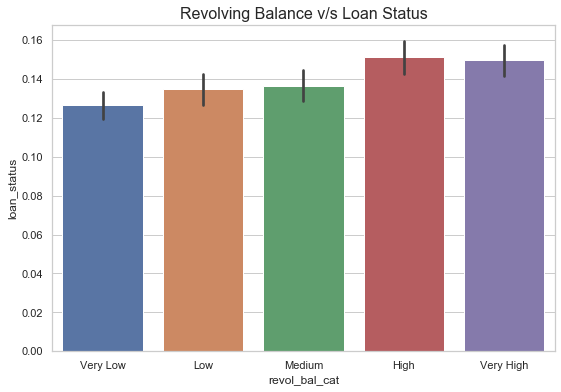

In [1636]:
# Plotting the revolving balance of the borrower against the loan status

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.revol_bal_cat ,'Revolving Balance v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that there is not much change in the default rates with borrowers having low revolving balance to high recolving balance

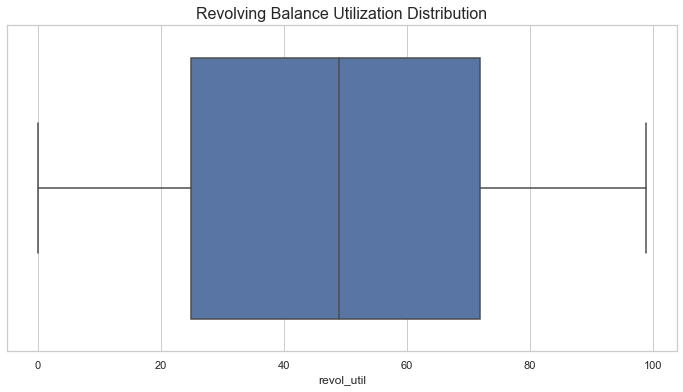

count    35367.000000
mean        48.699635
std         28.208251
min          0.000000
0%           0.000000
10%          8.000000
20%         20.000000
30%         30.000000
40%         40.000000
50%         49.000000
60%         58.000000
80%         77.000000
100%        99.000000
max         99.000000
Name: revol_util, dtype: object

In [1637]:
#checking the distribution of borrower's revolving balance utilization

plotboxonevar(dfloan3.revol_util, 'Revolving Balance Utilization Distribution', 12 , 6)
dfloan3.revol_util.describe( percentiles = [0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.8, 1]).apply(lambda x: format(x, 'f'))

In [1638]:
# Divinding the revolving balance utilization into bins by qcut 10% , 10 to 30 % , 30 -60 , 60-80 and 80 -100

dfloan3.revol_util = pd.qcut(dfloan3.revol_util, [0 , 0.10 , 0.30, 0.60,0.80, 1 ] ,[ 'VL' , 'L' , 'M' ,'H' , 'VH'])

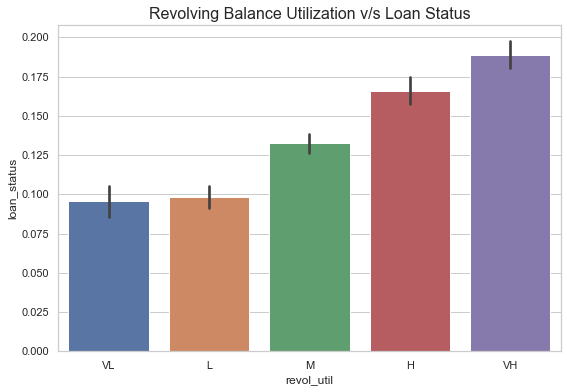

In [1639]:
# Plotting the revolving balance utilization of the borrower against the loan status

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.revol_util ,'Revolving Balance Utilization v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that as the revolving balance utilization increases, the default rate increases steadily as well.

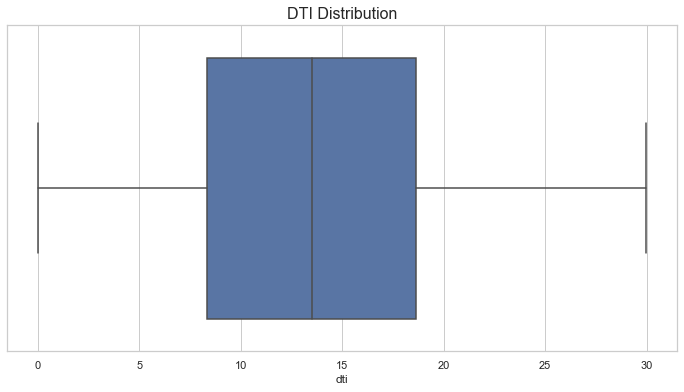

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
0%           0.000000
10%          4.220000
20%          7.130000
30%          9.430000
40%         11.524000
50%         13.500000
60%         15.440000
70%         17.540000
80%         19.790000
90%         22.360000
100%        29.990000
max         29.990000
Name: dti, dtype: float64

In [1640]:
#checking the distribution of borrower's debt to income ratio

plotboxonevar(dfloan3.dti, 'DTI Distribution', 12 , 6)
dfloan3.dti.describe( percentiles = [0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [1641]:
# function to categorize the debt to income ratio

def dti(n):
    if n <= 10:
        return 'Low'
    elif n > 10 and n <=16:
        return 'Medium'
    else:
        return 'High'

In [1642]:
# calling function dti to divide the amount in categorical variables, creating another categorical columns dti_cat

dfloan3['dti_cat'] = dfloan3['dti'].apply(lambda x: dti(x))

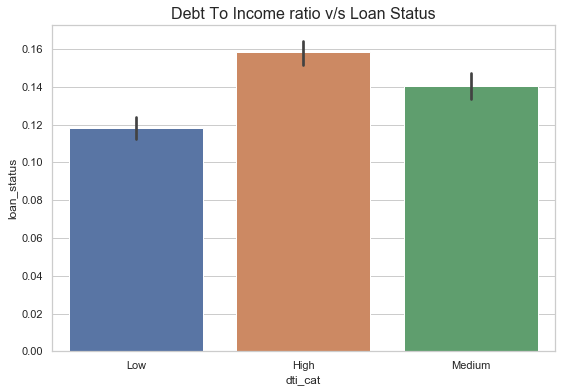

In [1643]:
# Plotting the debt to income ratio of the borrower against the loan status

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.dti_cat ,'Debt To Income ratio v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that as the debt to income ratio increases, the default rate increases steadily as well. This makes sense as more the debt, the higher the risk of default.

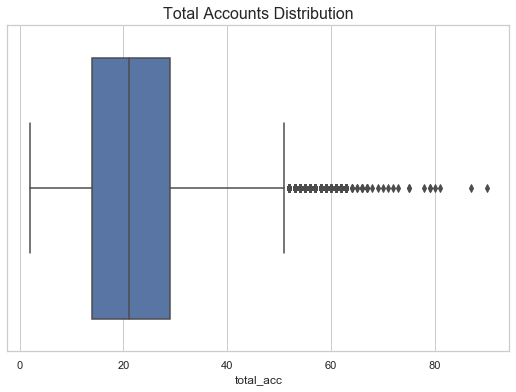

count    35367.000000
mean        22.209206
std         11.403045
min          2.000000
0%           2.000000
10%          9.000000
20%         12.000000
30%         15.000000
40%         18.000000
50%         21.000000
60%         24.000000
80%         31.000000
100%        90.000000
max         90.000000
Name: total_acc, dtype: object

In [1644]:
#checking the distribution of borrower's total number of accounts

plotboxonevar(dfloan3.total_acc, 'Total Accounts Distribution', 9 , 6)
dfloan3.total_acc.describe( percentiles = [0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.8, 1]).apply(lambda x: format(x, 'f'))

In [1645]:
# Divinding the debt to income ratio into bins by qcut 25% , 25 to 50 % , 50 to 75 % , 75 - 100 %

dfloan3.total_acc = pd.qcut(dfloan3.total_acc, [0 , 0.25 , 0.50, 0.75, 1] ,[ 'Very Few Accounts' , 'Few Accounts' , 'Many Accounts' , 'Too many Accounts'])

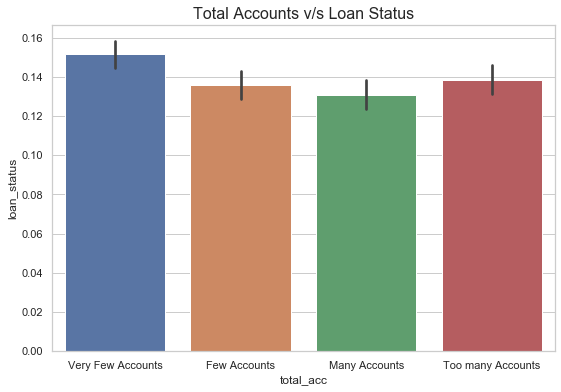

In [1646]:
# Plotting the total number of accounts of the borrower against the loan status

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.total_acc ,'Total Accounts v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that there is not much variation in the default rates for the borrowers having less number of accounts to the ones having too many number of accounts 

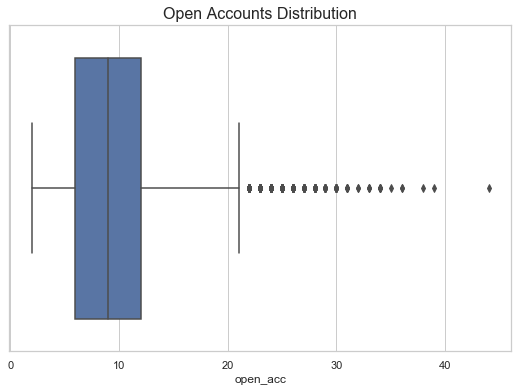

count    35367.000000
mean         9.332004
std          4.374975
min          2.000000
0%           2.000000
10%          4.000000
20%          6.000000
30%          7.000000
40%          8.000000
50%          9.000000
60%         10.000000
70%         11.000000
80%         13.000000
90%         15.000000
100%        44.000000
max         44.000000
Name: open_acc, dtype: object

In [1647]:
#checking the distribution of borrower's number of open accounts

plotboxonevar(dfloan3.open_acc, 'Open Accounts Distribution', 9 , 6)
dfloan3.open_acc.describe( percentiles = [0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).apply(lambda x: format(x, 'f'))

In [1648]:
# Divinding the borrower's open accounts into bins by qcut 25% , 25 to 50 % , 50 to 75 % , 75 - 100 %

dfloan3.open_acc = pd.qcut(dfloan3.open_acc, [0 , 0.25 , 0.50, 0.75, 1] ,[ 'Very Few Accounts' , 'Few Accounts' , 'Many Accounts' , 'Too many Accounts'])

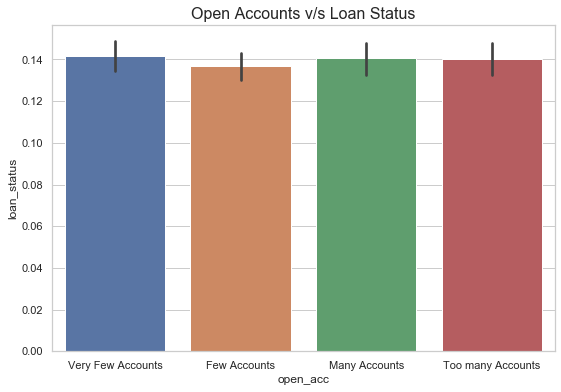

In [1649]:
# Plotting the number of  open accounts of the borrower against the loan status

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.open_acc ,'Open Accounts v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that there is not much variation in the default rates for the borrowers having less number of open accounts to the ones having too many number of open accounts 

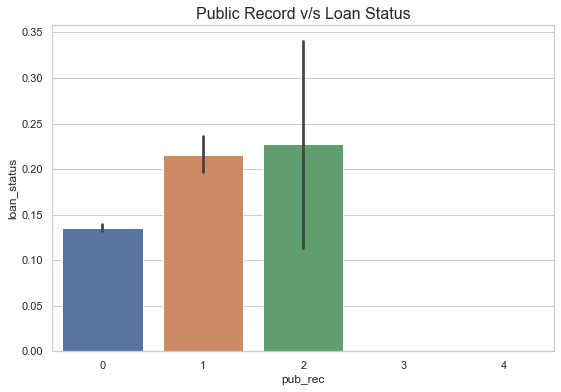

In [1650]:
# Plotting the public record of the borrower against the loan status

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.pub_rec ,'Public Record v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that more the derogatory public record of the borrower, the higher the default rate as expected.

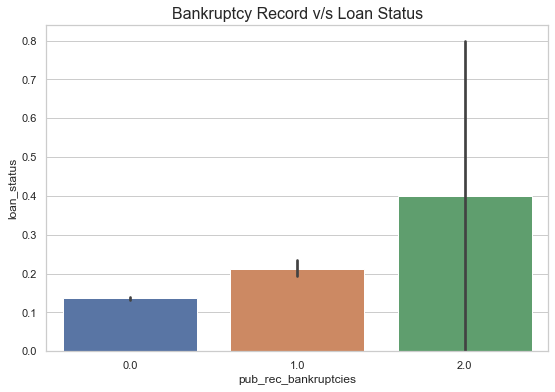

In [1651]:
# Plotting the bankruptcy record of the borrower against the loan status

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.pub_rec_bankruptcies ,'Bankruptcy Record v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that dubious the bankruptcy records of the borrower, higher the risk of loan default as expected.

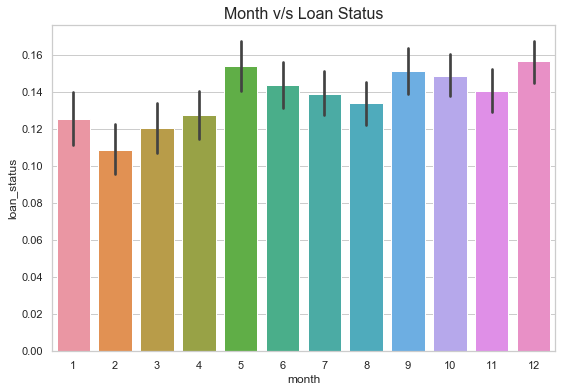

In [1652]:
# Plotting the month against the loan status to check which month produces more default rates

plt.figure(figsize=[9,6])
plotbaragainstloanStatus(dfloan3.month ,'Month v/s Loan Status')
plt.show()

### Observations:

#### It can be observed that second half of the year produces slightly more default rates compared to the first half

# Bivariate Analysis

In [1653]:
#Creating unique function to plot the loan status vs loan amount 
def pltBarWithLoanStatus_Hue(xvar,huevar ,graphTitle):  #, order_list=None) :   
    #plt.figure(figsize=(7,5))
    sns.barplot(x=xvar , y = dfloan3.loan_status ,  hue = huevar )#, order=order_list)
    plt.title(graphTitle, fontsize=16)
    #plt.ylabel('Loan Status', fontsize=12)
    #plt.xlabel(xLabel, fontsize=12)
    #plt.xticks(rotation = rotation)
    plt.show();

In [1654]:
# we can see that loan with 60 months and VH interest rate are more defaulters
pd.pivot_table(dfloan3 , values = 'loan_status' ,  columns= 'term'  , index = ['loan_amnt_cat' ])

term,36 months,60 months
loan_amnt_cat,,
High Amount,0.093571,0.241511
Low Amount,0.115308,0.246006
Medium Amount,0.100813,0.236373
Very High,0.109871,0.262803


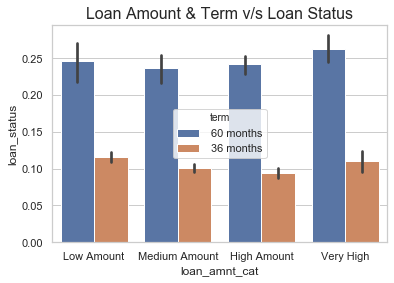

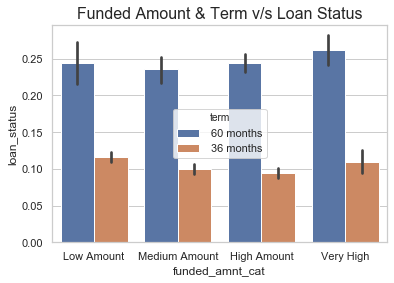

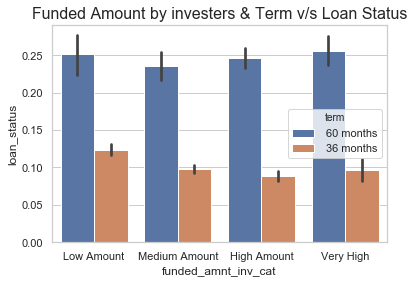

In [1655]:
# plotting Loan amt & term vs Loan Status ,
pltBarWithLoanStatus_Hue(dfloan3.loan_amnt_cat,  dfloan3.term,'Loan Amount & Term v/s Loan Status'  )
# plotting funded amt & term vs Loan Status'
pltBarWithLoanStatus_Hue(dfloan3.funded_amnt_cat,  dfloan3.term,'Funded Amount & Term v/s Loan Status'  )
#funded amt by investers & term vs Loan Status
pltBarWithLoanStatus_Hue(dfloan3.funded_amnt_inv_cat,  dfloan3.term,'Funded Amount by investers & Term v/s Loan Status'  )

#  we can see that all the 60 months loans are more defaulted than 36 monhts in all categories of loan amount, 
# funded loan amount and funded amount by investers

##### we can see that all the 60 months tenure loans are defeaulted than 36 monhts in all categories of loan amount , funded loan amount and funded amount by investers

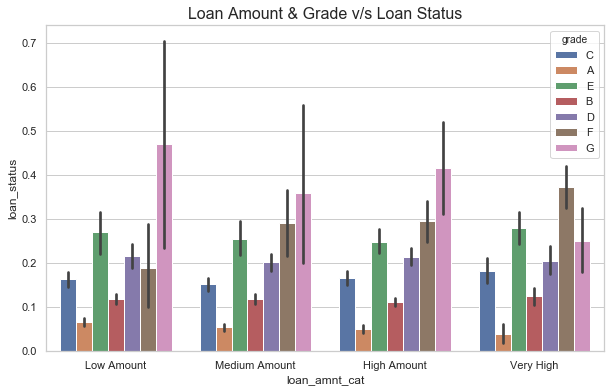

In [1656]:
# plotting Loan amt & Grade vs Loan Status ,surprisingly we can see that  G grade has lowest default rated for very high 
# loan amounts. However in general most of the G grade application are defaulted
plt.figure(figsize=[10,6])
pltBarWithLoanStatus_Hue(dfloan3.loan_amnt_cat,  dfloan3.grade,'Loan Amount & Grade v/s Loan Status'  )

#### surprisingly we can see that  G grade has hihgest default rate for all categories of amount except Very high loan amounts  (>20k). for very high loan F grade is defaulted. However in general most of the G grade application are defaulted

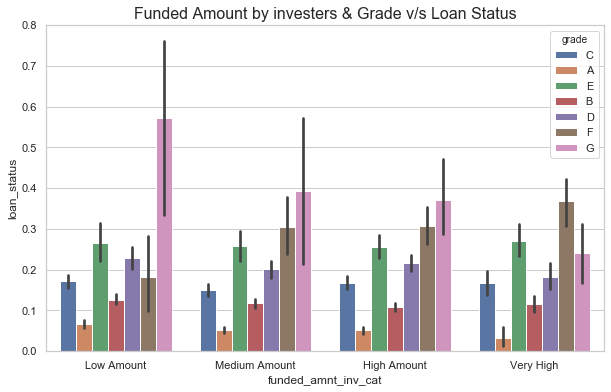

In [1657]:
# for funded amount by investers G grade applications are more defaulted than loan amount 
plt.figure(figsize=[10,6])
pltBarWithLoanStatus_Hue(dfloan3.funded_amnt_inv_cat,  dfloan3.grade,'Funded Amount by investers & Grade v/s Loan Status'  )

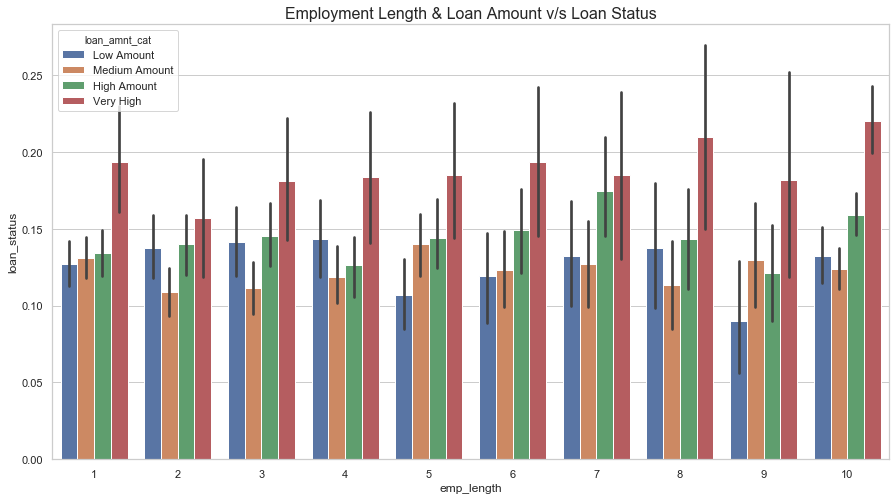

In [1658]:
# we can see that for each employee length category default rate is high for Very high amount
plt.figure(figsize=[15,8])
pltBarWithLoanStatus_Hue(dfloan3.emp_length ,dfloan3.loan_amnt_cat  ,'Employment Length & Loan Amount v/s Loan Status')

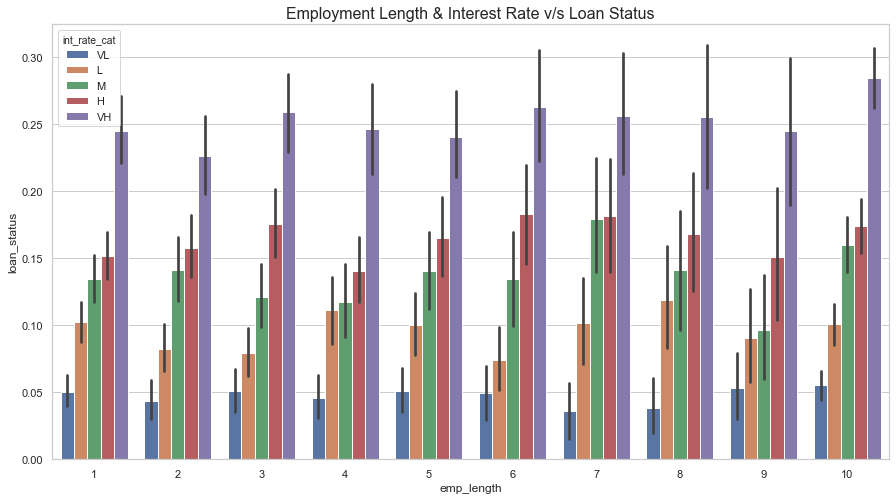

In [1659]:
# we can see that for each employee length category default rate is 
#increasing from very low to very high. Hence it shows us the stron relation 
plt.figure(figsize=[15,8])
pltBarWithLoanStatus_Hue(dfloan3.emp_length ,dfloan3.int_rate_cat  ,'Employment Length & Interest Rate v/s Loan Status')

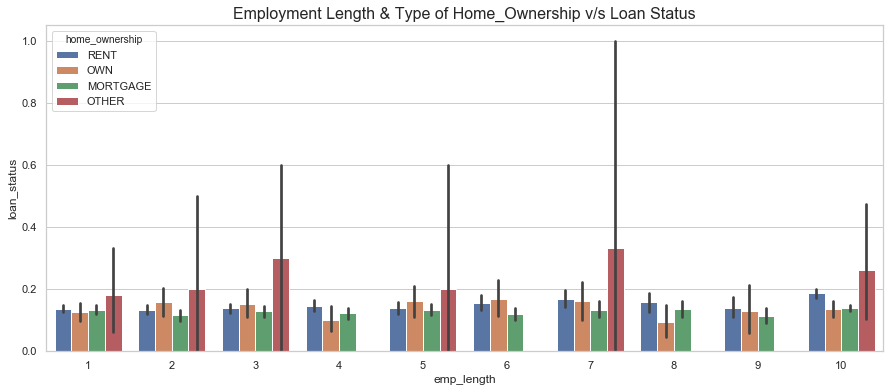

In [1660]:
# we can see that for each employee length category default rate is high for Other home_ownership
plt.figure(figsize=[15,6])
pltBarWithLoanStatus_Hue(dfloan3.emp_length ,dfloan3.home_ownership  ,'Employment Length & Type of Home_Ownership v/s Loan Status')

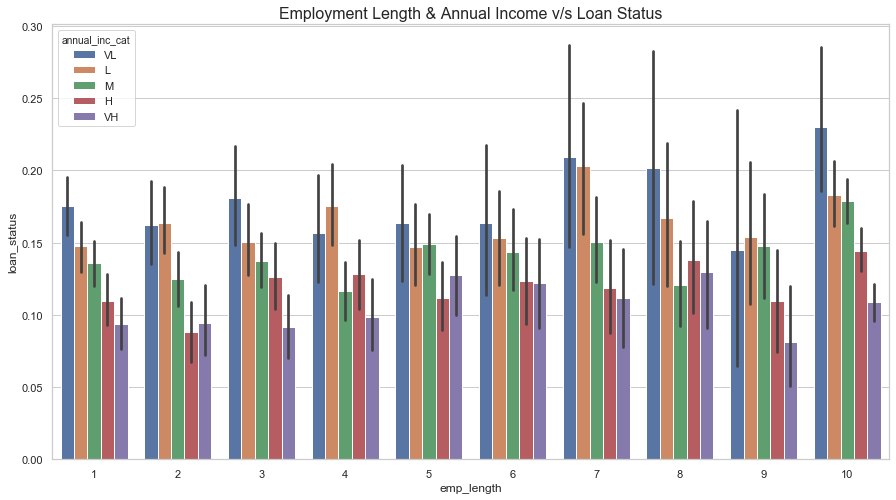

In [1661]:
# we can see that for each employee length category default rate is high for Low income 
plt.figure(figsize=[15,8])
pltBarWithLoanStatus_Hue(dfloan3.emp_length ,dfloan3.annual_inc_cat  ,'Employment Length & Annual Income v/s Loan Status')

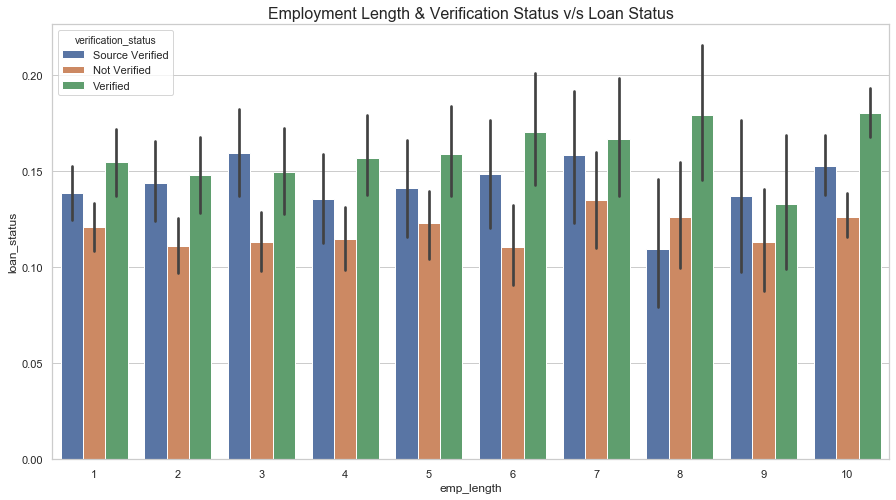

In [1662]:
# we can see that for each employee length category default rate is high for source verified customers

plt.figure(figsize=[15,8])
pltBarWithLoanStatus_Hue(dfloan3.emp_length ,dfloan3.verification_status  ,'Employment Length & Verification Status v/s Loan Status')

#### Above graph is very interesting as we can see source verified customers tends to be more defaulty .

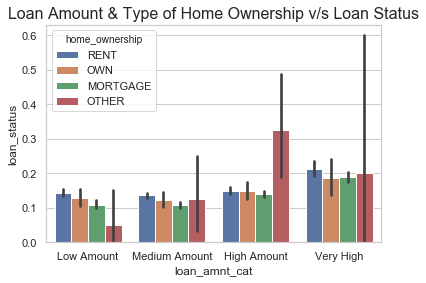

In [1663]:
# Here we can see that  "Other" category of home ownership has high default rate for High amount, but for  
# other categories of loan amount "Rented" one are more defaulted
pltBarWithLoanStatus_Hue(dfloan3.loan_amnt_cat ,dfloan3.home_ownership  ,'Loan Amount & Type of Home Ownership v/s Loan Status')

In [1664]:
# checking different employee titles
dfloan3.emp_title.value_counts()

US Army                       128
Bank of America               106
IBM                            65
AT&T                           57
Kaiser Permanente              55
                             ... 
rbx                             1
Bloomington Public Schools      1
Ericsson Inc.                   1
Stardust Video & Coffee         1
TM Floyd & Company              1
Name: emp_title, Length: 27414, dtype: int64

In [1665]:
# replacing the duplicate keyword of US ARMY, US Navy , Airforce with common name

dfloan3.loc[dfloan3['emp_title'].isin(['US Army','U.S. Army','US ARMY','us army','United States Army']), 'emp_title'] ='US Army'
dfloan3.loc[dfloan3['emp_title'].isin(['US Navy','United States Navy','US Navy' ,'Us Navy' ,'U.S. Navy' ]), 'emp_title'] ='US Navy'
dfloan3.loc[dfloan3['emp_title'].isin(['US Air Force','U.S. Air Force','United States Air Force']), 'emp_title'] ='US Air force'
dfloan3.loc[dfloan3['emp_title'].isin([ 'Bank of America','Bank Of America','Bank of America Corp.']), 'emp_title'] ='Bank of America'

In [1666]:
dfloan3.emp_title.value_counts()

US Army                    268
Bank of America            127
US Air force               105
IBM                         65
US Navy                     61
                          ... 
the caroline collection      1
Newman Machine               1
Consumers Union              1
COSTCO WHOLESALE             1
TM Floyd & Company           1
Name: emp_title, Length: 27402, dtype: int64

In [1667]:
# filtering the Top5 employee Title , creating new temp dataframe out of dfloan3

top5empTitle=dfloan3.emp_title.value_counts().sort_values(ascending=False).index.to_list()[0:5]
dfloan3_temp = dfloan3[dfloan3.emp_title.isin(top5empTitle)]
print(top5empTitle)

['US Army', 'Bank of America', 'US Air force', 'IBM', 'US Navy']


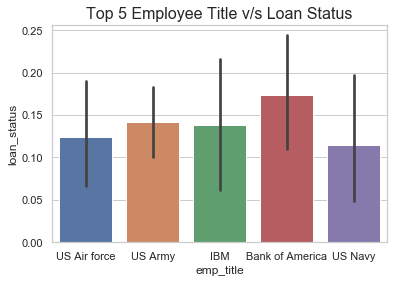

In [1668]:
#We can see that Bank of america employees are more defaulted followed by US Army , IBM. 

plotbaragainstloanStatus(dfloan3_temp.emp_title ,'Top 5 Employee Title v/s Loan Status')

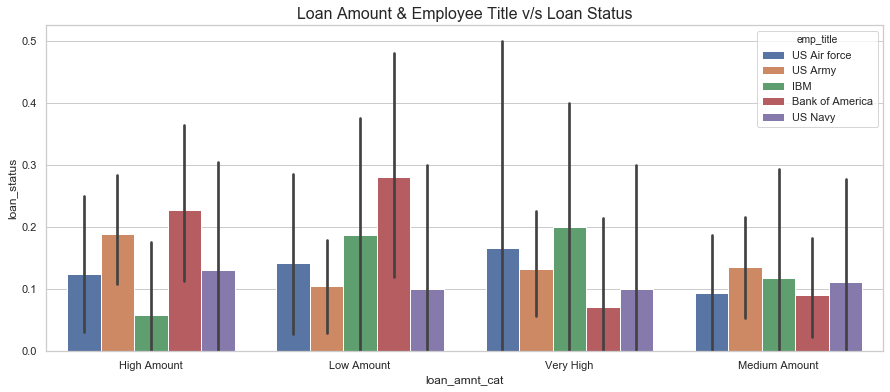

In [1669]:
#Low and High amount , bank of america people are in top defaulter list 
#Us Army tops in medium amount 
#IBM tops in very high amount
plt.figure(figsize=[15,6])
pltBarWithLoanStatus_Hue(dfloan3_temp.loan_amnt_cat ,dfloan3_temp.emp_title ,'Loan Amount & Employee Title v/s Loan Status')

- for Low and High amount , bank of america people are in top defaulter list 
- Us Army tops in medium amount 
- IBM tops in very high amount

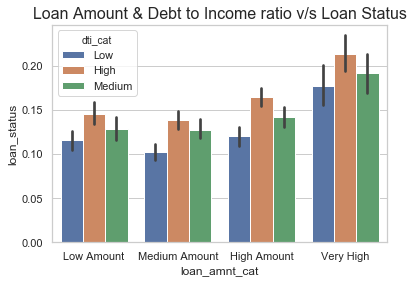

In [1671]:
# Plotting loan amount and DTI ratio against the loan status

pltBarWithLoanStatus_Hue(dfloan3.loan_amnt_cat ,dfloan3.dti_cat ,'Loan Amount & Debt to Income ratio v/s Loan Status')

### Observations:

#### It can be observed that maximum defaulters belongs to high loan amount and higher debt to income ratio.

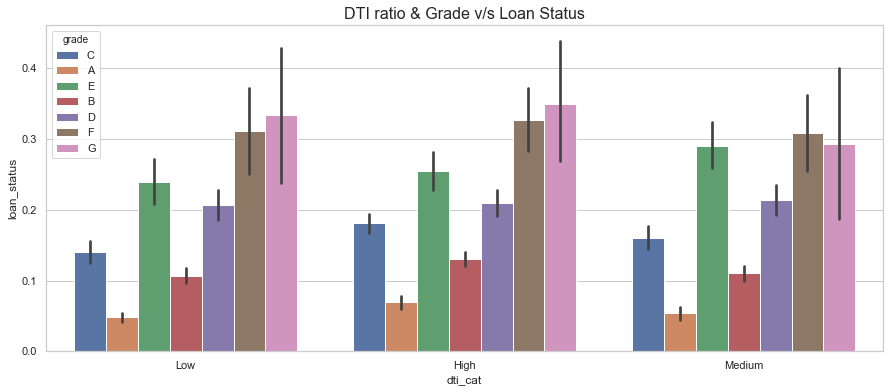

In [1672]:
# Plotting DTI and grade against the loan status

plt.figure(figsize=[15,6])
pltBarWithLoanStatus_Hue(dfloan3.dti_cat ,dfloan3.grade ,'DTI ratio & Grade v/s Loan Status')

### Observations:

#### It can be observed that irrespective of the debt to income ratio, Grade F and Grade G has maximum defaulters

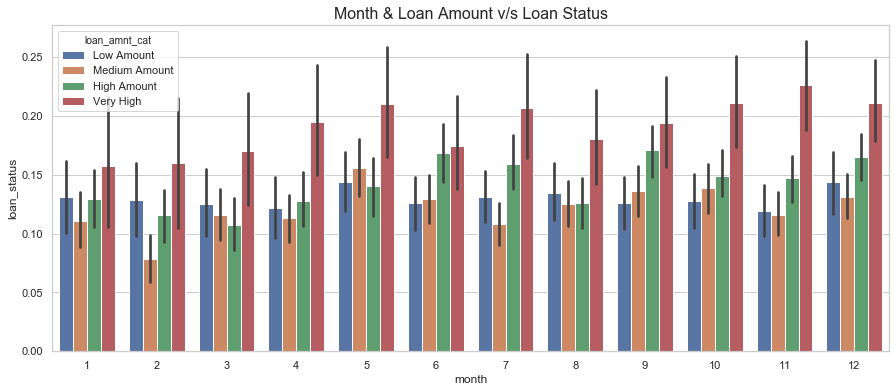

In [1673]:
# Plotting loan amount and month against the loan status

plt.figure(figsize=[15,6])
pltBarWithLoanStatus_Hue(dfloan3.month ,dfloan3.loan_amnt_cat ,'Month & Loan Amount v/s Loan Status')

### Observations:

#### It can be observed that the very high loan amount has maximum defaulters irrespective of the month.

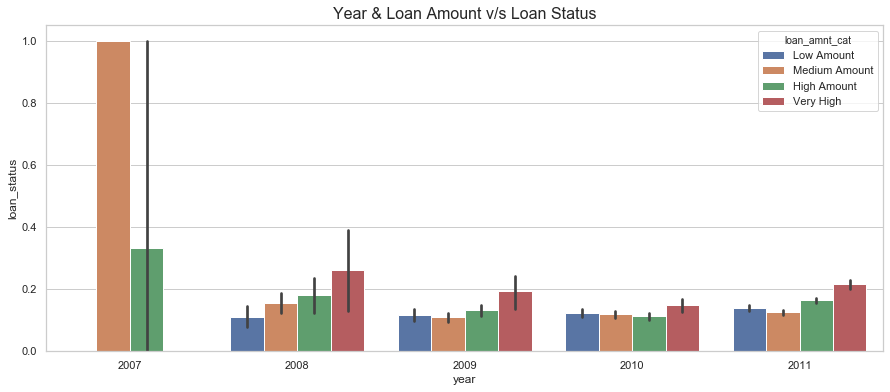

In [1674]:
# Plotting loan amount and year against the loan status

plt.figure(figsize=[15,6])
pltBarWithLoanStatus_Hue(dfloan3.year ,dfloan3.loan_amnt_cat ,'Year & Loan Amount v/s Loan Status')

### Observations:

#### It can be observed that in 2007 most of the loan amout fell in the Medium or High category.
#### Also the default rates are very high in 2007 (the year of inception of the lending club)
#### It can also be observed that the very high loan amounts have always seen the maximum defaulters.

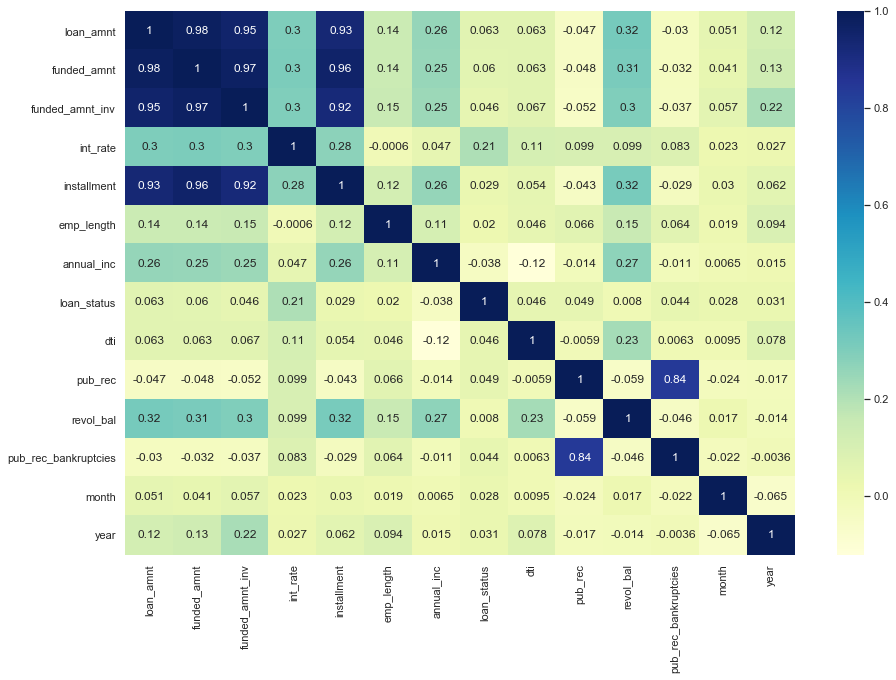

In [1675]:
#plotting heatmap for the numerical varaibles. we can see that loan amount , funded amount and funded amount by investers 
#are more correlated with each other and installment , means high amount--> high installment
# revolving utilization has also correlation with interest rate

plt.figure(figsize=[15,10])
plt.xticks(rotation=40) 
sns.heatmap(dfloan3.corr() ,annot=True, cmap="YlGnBu")
plt.show()

## Default Rate Analysis 
#### we can see many important indicater  for loan default rate with above analysis i.e. loan amount , funded amount by investers , grade , interest rate , subgrade , employment length , home ownership etc. 
#### Correct way to find the top indicators by analysing how much default rate vary across each category 

In [1676]:
# to calculate the difference rate , creating generic funciton with loan status
def caldefaultrateDiff(col):
    diffdf= dfloan3.groupby(col)['loan_status'].mean().sort_values(ascending=False)
    return round((diffdf[0] - diffdf[-1])*100 , 3)

In [1677]:
#selecting only oject and categories
categoricaldf= dfloan3.select_dtypes(['object' , 'category'])
#excluding some columns .. later can be removed 
categoricaldf = categoricaldf.loc[:,~categoricaldf.columns.isin(['emp_title','title', 'zip_code','addr_state', 
                                                                 'earliest_cr_line'])]
print(categoricaldf.columns)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'open_acc', 'revol_util', 'total_acc', 'loan_amnt_cat',
       'funded_amnt_cat', 'funded_amnt_inv_cat', 'int_rate_cat',
       'installment_cat', 'annual_inc_cat', 'revol_bal_cat', 'dti_cat'],
      dtype='object')


In [1678]:
#we can see subgrade , grade , term, loan_amnt are the top indicator
defaultdict ={i: caldefaultrateDiff(i) for i in categoricaldf.columns}
print(sorted(defaultdict.items(), key=lambda x: x[1] , reverse = True))

[('sub_grade', 44.176), ('grade', 27.366), ('purpose', 16.755), ('term', 14.266), ('loan_amnt_cat', 7.371), ('annual_inc_cat', 7.11), ('funded_amnt_cat', 7.073), ('funded_amnt_inv_cat', 6.223), ('home_ownership', 6.018), ('verification_status', 4.362), ('dti_cat', 3.986), ('revol_bal_cat', 2.451), ('total_acc', 2.115), ('installment_cat', 0.889), ('open_acc', 0.502), ('revol_util', 0.0), ('int_rate_cat', 0.0)]


# Analysis  Result 
  #### Below are top indicators
      -- sub_grade 
      -- grade 
      -- purpose
      -- term
      -- loan amount
      
#### Funded amount by investors can also be considered as the driving factor as it denotes the final loan amount approved for the borrower